In [62]:
from IPython.display import clear_output
import os,math,json
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np



root = tk.Tk()
root.attributes('-topmost', True)  # makes it appear on top of other windows
root.withdraw()

try:
    import librosa
    from sklearn.model_selection import train_test_split
    import tensorflow.keras as keras
    import matplotlib.pyplot as plt
except ImportError:
    !pip install wheel
    !pip install librosa
    !pip install sklearn
    !pip install tensorflow
    !pip install matplotlib
    import librosa
    from sklearn.model_selection import train_test_split
    import tensorflow.keras as keras
    import matplotlib.pyplot as plt
clear_output()


In [9]:
train = filedialog.askdirectory(title="Training Data",initialdir=os.path.dirname(__name__))

In [31]:
FilesFullPathList = []
data = {
    "mapping":[],
    "labels":[],
    "mfcc":[]
    
}


labelsDict = {
    "airPort": 0,
    "car":1,
    "publicRoad":2,
    "trainStation":3
}



n_mfcc=13
n_fft=2048
hop_length = 512

SAMPLE_RATE = 16000
DURATION = (60 * 15)//2 # 7:30 minutes
SAMPLE_PER_TRACK = SAMPLE_RATE * DURATION

NUM_SEGMENTS = 10
num_samples_per_segment = int(SAMPLE_PER_TRACK/NUM_SEGMENTS)
expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

# loop through files
for dir,dirnames,filenames in os.walk(train):
    for filename in filenames:
        # get full path of file
        fileFullPath = os.path.join(os.path.normpath(dir),filename)
        
        # get only file name not file path
        file_label = os.path.split(fileFullPath)[-1]
        
        # only type of file >>> car_2.wav > car
        file_label = file_label[:file_label.find("_")]
        print(file_label)
        data["mapping"].append(file_label)
        
        
        signal,sr = librosa.load(fileFullPath,sr=SAMPLE_RATE)
        
        for s in range(NUM_SEGMENTS):
            start_sample = num_samples_per_segment * s
            finish_sample = start_sample + num_samples_per_segment
            
            mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample],
                                        sr=sr,
                                        n_fft=n_fft,
                                        n_mfcc=n_mfcc,
                                        hop_length=hop_length)
        mfcc = mfcc.T
        
        if len(mfcc) == expected_num_mfcc_vectors_per_segment:
            data["mfcc"].append(mfcc.tolist())
            print()
            data["labels"].append(labelsDict[file_label])
Data = pd.DataFrame(data)

airPort

airPort

airPort

car

car

car

publicRoad

trainStation

trainStation

trainStation



In [32]:
Data

,mapping,labels,mfcc
0,airPort,0,"[[-250.1691436767578, 123.79141235351562, 7.49..."
1,airPort,0,"[[-214.7112579345703, 128.86627197265625, -4.0..."
2,airPort,0,"[[-310.0280456542969, 168.42225646972656, -3.0..."
3,car,1,"[[-184.85662841796875, 127.96393585205078, 34...."
4,car,1,"[[-234.18670654296875, 183.50491333007812, 43...."
5,car,1,"[[-280.3216857910156, 105.30126953125, 26.4516..."
6,publicRoad,2,"[[-250.76710510253906, 129.00759887695312, -20..."
7,trainStation,3,"[[-218.1586151123047, 113.64745330810547, -18...."
8,trainStation,3,"[[-205.2772674560547, 148.1512451171875, 2.004..."
9,trainStation,3,"[[-238.29576110839844, 141.7223358154297, 7.12..."


In [67]:

inputs = np.array(Data.mfcc.tolist())
targets = np.array(Data.labels)

In [68]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets,test_size=0.3)

In [69]:
inputs.shape

(10, 1407, 13)

In [78]:
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    
    
    # hidden layer #1
    keras.layers.Dense(1024,activation="relu"),
    # hidden layer #2
    keras.layers.Dense(1024,activation="relu"),
    # hidden layer #3
    keras.layers.Dense(1024,activation="relu"),
    
    # OUTPUT
    keras.layers.Dense(4,activation="softmax")
])

In [79]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 18291)             0         
                                                                 
 dense_12 (Dense)            (None, 1024)              18731008  
                                                                 
 dense_13 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_14 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_15 (Dense)            (None, 4)                 4100      
                                                                 
Total params: 20,834,308
Trainable params: 20,834,308
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model.fit(inputs_train,targets_train,
          validation_data=(inputs_test,targets_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
1/1 [==============================] - 1s 563ms/step - loss: 59.9332 - accuracy: 0.2857 - val_loss: 324.7202 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 89ms/step - loss: 182.4605 - accuracy: 0.4286 - val_loss: 317.6825 - val_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 108ms/step - loss: 205.4710 - accuracy: 0.2857 - val_loss: 155.8020 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 87ms/step - loss: 67.6082 - accuracy: 0.4286 - val_loss: 107.5192 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 84ms/step - loss: 51.6515 - accuracy: 0.4286 - val_loss: 60.3111 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 86ms/step - loss: 40.1026 - accuracy: 0.7143 - val_loss: 85.1352 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 88ms/step - loss: 49.3808 - accuracy: 0.5714 - val_loss: 67.1529 - val_accurac

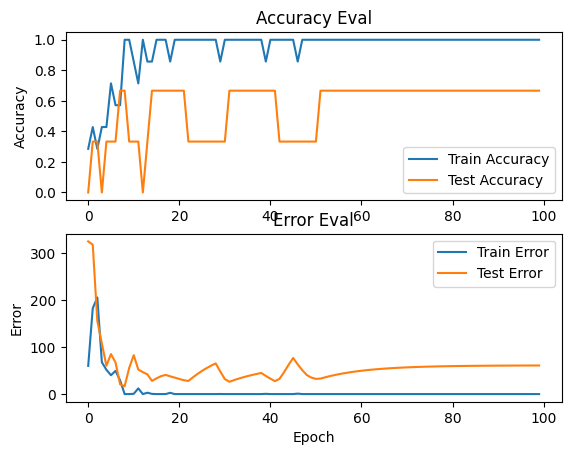

In [81]:

fig,axs = plt.subplots(2)

axs[0].plot(history.history["accuracy"],label="Train Accuracy")
axs[0].plot(history.history["val_accuracy"],label="Test Accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy Eval")


axs[1].plot(history.history["loss"],label="Train Error")
axs[1].plot(history.history["val_loss"],label="Test Error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error Eval")


plt.show()